# Intro to Python


### Topics

- What is Python (how is it different than e.g. C++)
- Why you should (or shouldn't) use Python
- How Python is intended to be used or how to mitigate the cons, while using the pros
- Useful tools
    - Librairies
    - Iterator design
    - Data structures
    - OOP design

### What is the point, why are we coding?

Mostly, we want to do good physics as quick and easily as possible. 
What are our use cases?
- Data analysis: download data, parse data, look at data, plot data, use librairies to analyse data
- Higher level software development: creating algorithms and tools to use on data, developing ML pipelines, developing higher level content within collaboration software 
- But really: doing quick and dirty checks, being able to rapidly load data, rapidly display and format plots, etc.

### So why Python?

Python is an interpreted (or interactive) language. What this mean to you is that as far as you are concerned, Python is ***not*** compiled and just runs magically. You type something and it just happens, fantastic!

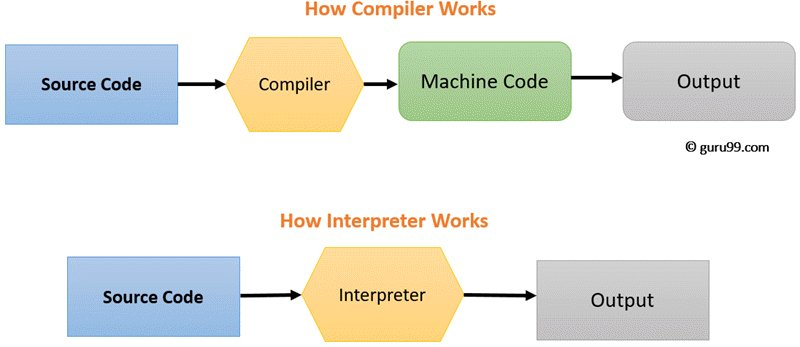

In [4]:
from IPython import display
display.Image("./images/interpreter_vs_compiler.jpg")

Now obviously there are a lot of caviats with this sentence:
- Languages can typically be both interpreted and compiled. You **can** compile your python code!
- Even interpreted languages will usually be compiled for later use. If you run your python code twice, it will (usually) run much faster.
- Ultimately, all languages have to be compiled to machine code. It just depends *how* you do it.

What does it matter if it is compiled or interpreted?
- Compiled: 
    - Whole source code is taken as a block and compiled into machine code at once.
    - Will usually require more structure and explicit instructions for the compiler.
    - Allows for more efficient usage of ressources, memory allocation and planning. Once compiled, it runs **fast**.
    - Every time you run is "independant".

- Interpreted:
    - One line at a time, the code is parsed, compiled & ran.
    - Once it is ran, the interpreter remembers and can run it faster!
    - Poor planning due to "line by line" nature. Usually pretty **slow**.
    - Very easy to debug, and perfect for interactive usage with data.


#### Dual language problem ???:

Because Python is so slow, the heavy lifting is often done using compiled languages such as C ro Fortran. The dual language setup is to use Python to run C/C++ backend. This is what a lot of Physics collaboration do: HEP, ? 


### Let's set it up:

You can download these notes from github at: ??


You can get python notebook in IDE of your choice:
- Jupyter notebook: at ??
- Visual studio: you can go to extension and download jupyter notebook and python.


### Variable Declaration & Mathematical Expressions

In [42]:
a = 1
b = 3.0
c = 2*a + b/a # multiplication and division
d = c**b # exponentiation
e, f = b%a, d//c # modulus and floor division 

No type declaration. Python variables are "names" that point to objects that have a type. Therefore, they are not reference type!

So what are the types of these variables?

In [80]:
print(f'The type of a, {a}, is: {type(a)}.')
print(f'The type of b, {b}, is: {type(b)}.')
print(f'The type of c, {c}, is: {type(c)}.')

The type of a, 1, is: <class 'int'>.
The type of b, 3.0, is: <class 'float'>.
The type of c, 5.0, is: <class 'float'>.


### Strings and Printing

In [62]:
normal_string = "A normal string"
print(normal_string)

f_string = f"An f string with variable input: c = {c}"
print(f_string)

print(f"An f string with special format: d = {d:.2f}." \
    + f' You can add strings together to concatenate and even do math in here! {e} + {f} = {e + f}')

A normal string
An f string with variable input: c = 5.0
An f string with special format: d = 125.00. You can add strings together to concatenate and even do math in here! 0.0 + 25.0 = 25.0


### Arrays, list

In [83]:
import numpy

my_list = [1, 2, 3]
my_array = numpy.array(my_list)
my_2dlist = [ [1, 2, 3],
                [4, 5, 6]]

print(f'print the list: {my_list}', f', print the array:{my_array}')
print(f'print the 2dlist: {my_2dlist}')

# list can contain more than one type!
multi_type_list = [1, 3.5, "potato"]
print(f'print the multi type list: {multi_type_list}')

print the list: [1, 2, 3] , print the array:[1 2 3]
print the 2dlist: [[1, 2, 3], [4, 5, 6]]
print the multi type list: [1, 3.5, 'potato']


### Function Declaration

In [77]:
def my_addition(x, y=1):
    return x + y

print(f'Addition of {a} and {b} is: {my_addition(a, b)}')
print(f'Addition of {a} and nothing is: {my_addition(a)}')

Addition of 1 and 3.0 is: 4.0
Addition of 1 and nothing is: 2


As you may notice, "my_addition" does not have a specified input or return type. You can use it with any type you want! It will by default use the overiden operator for that variable type.

In [71]:
s1 = "Hello "
s2 = "World!"
print(f'Addition of {s1} and {s2} is: {my_addition(s1,s2)}')

arr1 = [1,2,3]
arr2 = [4,5,6] 
print(f'Addition of {arr1} and {arr2} is: {my_addition(arr1,arr2)}')

Addition of Hello  and World! is: Hello World!
Addition of [1, 2, 3] and [4, 5, 6] is: [1, 2, 3, 4, 5, 6]


If this flexibility bothers you, you can *hint* at what type should be used in your function (note that this is not enforced!). Python is however designed not to discriminate based on type, so don't force it unless you really need too.

In [79]:
def my_int_addition(x : int, y : int) -> int:
    return x + y

my_int_addition(s1, s2) # try replacing the function parameters to see the hinted types

'Hello World!'

### Loop and Standard Logical Operations

Python is **very** slow with normal loop architecture (again, low efficiency in run time allocation of ressources).

In [95]:
# standard for-loop structure, Python uses iterators!
for item in multi_type_list:
    print(item)
print(" ")

# you can also get the index through enumerators
for index, item in enumerate(multi_type_list):
    print(f'{index}: {item}')
print(" ")

# you can get multiple lists at the same time by zipping them
for item1, item2 in zip(arr1, arr2):
    print(item1, item2)
print(" ")

my_bool = True
counter = 0
while(my_bool):
    if(counter > 3):
        my_bool = False 
    counter += 1

1
3.5
potato
 
0: 1
1: 3.5
2: potato
 
1 4
2 5
3 6
 


Because Python has slow loops, we use array operations to be faster!

In [152]:
import timeit

#summing with numpy array operations
import_module = "import numpy as np"

testcode = '''
np.sum(np.arange(500))
'''
print(timeit.timeit(stmt=testcode, setup=import_module))

#summing with native python loops 
import_module = "import numpy as np"

testcode = '''
total = 0
for i in np.arange(500):
    total += i
'''
print(timeit.timeit(stmt=testcode, setup=import_module))

5.503227599998354
45.78543509999872


If there is a package for it, **always** use it! Most of your calculations have premade librairy implementations: sum, mean, std, ... 

If your function is more complicated, you can always use maps or list comprehensions! Also use masks

In [153]:
import numpy as np

long_array = np.arange(500)

#find which numbers modulo 5
def modulo():
    ????
    


pandas example of creating a dataframe, using it to display stuff, applying operations on them

### Object Oriented Programming (OOP) in Python 

In [55]:
# Our class will define things that relate to cubes 
class Cube:
    length = 2

    def volume(self):
        return self.length**3

my_cube = Cube()
print(f'The volume of my cube is : {my_cube.volume()}')

The volume of my cube is : 8


vertex #0 is located at 1, 1, 0
vertex #1 is located at 1, 0, 1
vertex #2 is located at 0, 1, 1
vertex #3 is located at 0, 0, 0


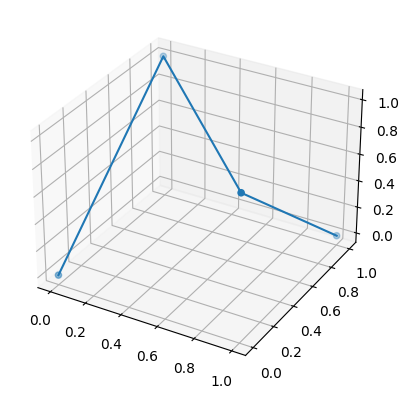

In [36]:
# A more involved class...
from dataclasses import dataclass

@dataclass
class Vertices:
    x: float
    y: float
    z: float

class Shape:
    def __init__(self, list_vertices: list[list[int]]):
        self.n_vertices = len(list_vertices)
        self.vertices = self.define_vertices(list_vertices) 

    def __str__(self) -> str:
        return "this is an object that contains a shape and its vertices"

    def define_vertices(self, list_vertices) -> list[Vertices]:
        list_object = [Vertices(*i) for i in list_vertices] 
        return list_object

    def print_vertex(self):
        for index, vertex in enumerate(self.vertices):
            print(f'vertex #{index} is located at {vertex.x}, {vertex.y}, {vertex.z}')

    def display_vertices(self):
        ax = plt.axes(projection='3d')
        xdata = [i.x for i in self.vertices]
        ydata = [i.y for i in self.vertices]
        zdata = [i.z for i in self.vertices]

        ax.scatter3D(xdata, ydata, zdata)
        ax.plot3D(xdata,ydata,zdata)



my_shape = Shape([[1,1,0],[1,0,1],[0,1,1], [0,0,0]])  
my_shape.print_vertex()
my_shape.display_vertices()


## Plotting with functions and maps

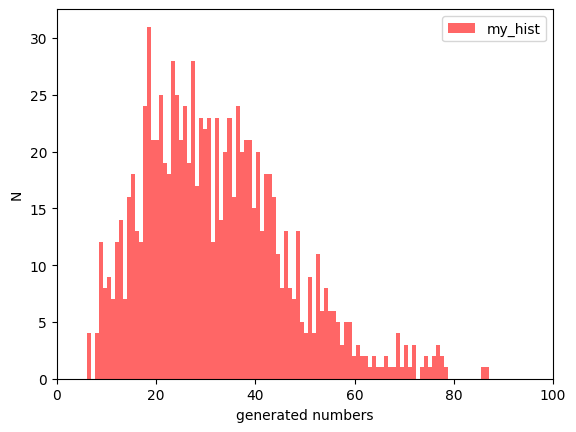

In [29]:
size, scale = 1000, 10
generated_numbers = pd.Series(numpy.random.gamma(scale, size=size) ** 1.5)

def my_plotting_script(label, kwargs):
    plt.hist(generated_numbers.values, label=label, **kwargs)#**kwargs)
    plt.legend()
    plt.xlim(0,100)
    plt.xlabel('generated numbers')
    plt.ylabel('N')

kwargs = {
            'bins':100,
            'color':'red',
            'alpha':0.6
            }

my_plotting_script("my_hist", kwargs)